#Web scrapping 

##Scrapping [List of Indian Playback Singers](https://en.wikipedia.org/wiki/List_of_Indian_playback_singers) from Wikipedia

In [0]:
#Importing Libraries 

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:

# Send a GET request to the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Indian_playback_singers"
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find tables containing the list of Indian playback singers
male_table = soup.find_all('table', class_='wikitable')[1]
female_table = soup.find_all('table', class_='wikitable')[0]

# Initialize an empty list to store the data
data = []

# Function to extract data from a table
def extract_data(table, sex):
    for row in table.find_all('tr')[1:]:  # Skip the first row (header row)
        columns = row.find_all('td')  # Find all columns in the current row
        # Extract text from each column
        row_data = [column.text.strip() for column in columns]
        # Add sex to the data
        row_data.append(sex)
        data.append(row_data)

# Extract data for male singers
extract_data(male_table, 'Male')

# Extract data for female singers
extract_data(female_table, 'Female')

# Create a DataFrame with the extracted data
Data = pd.DataFrame(data, columns=['Timeline', 'Name', 'Language', 'Sex'])

# Function to calculate age from timeline
def calculate_age(timeline):
    years = timeline.split('–')
    if len(years) == 2:
        try:
            left_year = int(years[0])
            current_year = datetime.now().year
            return current_year - left_year
        except ValueError:
            return None
    else:
        return None

# Add a new column for age
Data['Age'] = Data['Timeline'].apply(calculate_age)

# Drop rows where age is not available
Data = Data.dropna(subset=['Age'])

# Convert age column to integer
Data['Age'] = Data['Age'].astype(int)

# Add a new column for language count
Data['Language_count'] = Data['Language'].apply(lambda x: len(x.split(',')))

# Rearrange columns
Data = Data[['Timeline', 'Age', 'Name', 'Sex', 'Language', 'Language_count']]

# Display the DataFrame
Data


,Timeline,Age,Name,Sex,Language,Language_count
0,2016–present,8,32Stitches,Male,English,1
1,2003–present,21,Alphons Joseph,Male,"Malayalam, Tamil, Telugu, Kannada, Hindi",5
2,2009–present,15,Ash King,Male,"Bengali, Gujarati, Hindi, Telugu",4
3,2012–present,12,Aaman Trikha,Male,"Hindi, English, Punjabi, Kannada, Tamil, Malay...",13
4,1995–present,29,Aditya Narayan,Male,"Nepali, Hindi, Bengali",3
...,...,...,...,...,...,...
364,2000–present,24,Vaishali Samant,Female,"Marathi, Hindi",2
365,2012–present,12,Vandana Srinivasan,Female,Tamil,1
366,1971–2023,53,Vani Jayaram,Female,"Telugu. Hindustani, Tamil, Marathi, Gujarati, ...",10
367,1994–present,30,Vasundhara Das,Female,"Tamil, Telugu, Hindi, Malayalam, Kannada",5


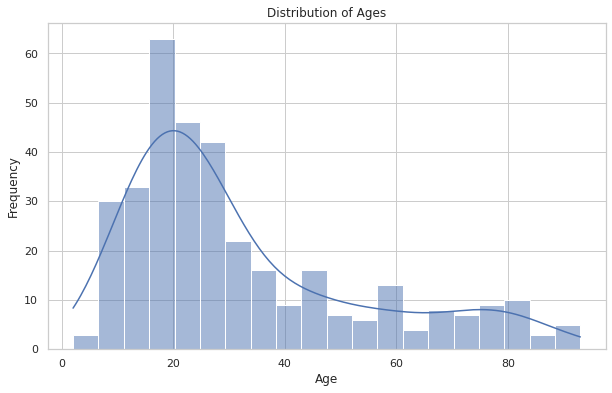

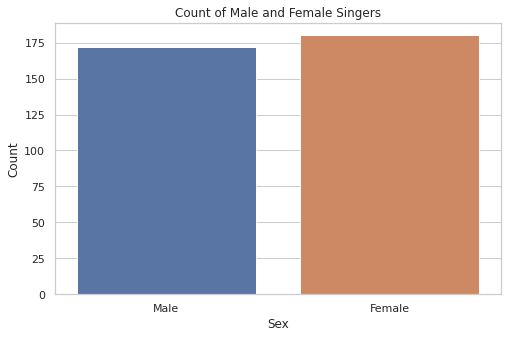

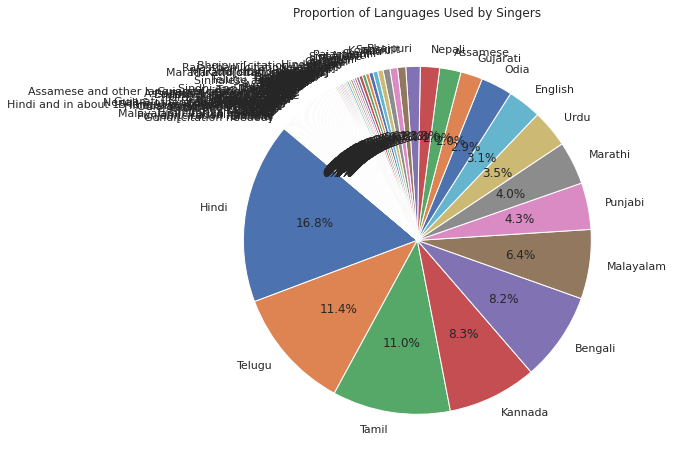

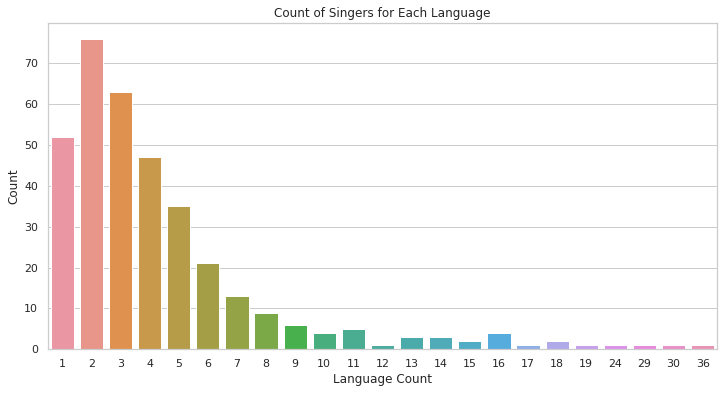

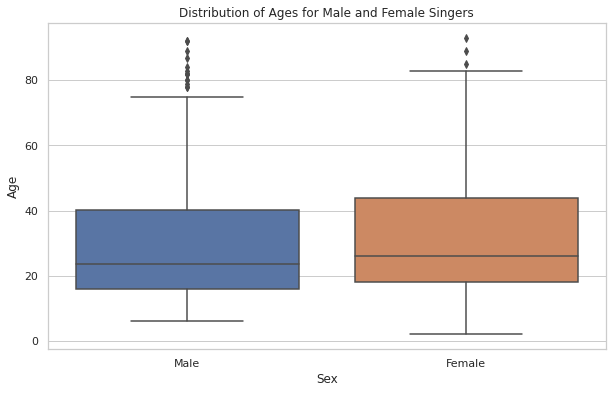

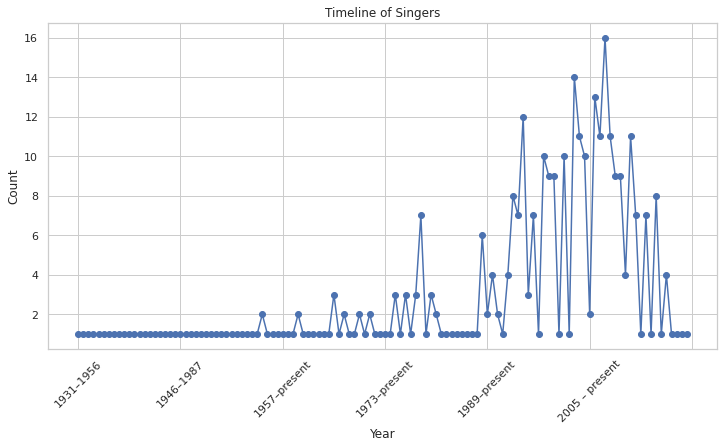

In [0]:

# Set the style for seaborn plots
sns.set_style('whitegrid')

# 1. Histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(Data['Age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Bar plot of male and female singers count
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=Data)
plt.title('Count of Male and Female Singers')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 3. Pie chart of languages
plt.figure(figsize=(8, 8))
Data['Language'].str.split(', ').explode().value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Languages Used by Singers')
plt.ylabel('')
plt.show()

# 4. Count plot of singers for each language
plt.figure(figsize=(12, 6))
sns.countplot(x='Language_count', data=Data)
plt.title('Count of Singers for Each Language')
plt.xlabel('Language Count')
plt.ylabel('Count')
plt.show()

# 5. Box plot of ages for male and female singers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=Data)
plt.title('Distribution of Ages for Male and Female Singers')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# 6. Timeline of Singers
plt.figure(figsize=(12, 6))
Data['Timeline'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Timeline of Singers')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##Scrapping [List of Dadasaheb Phalke Award](https://en.wikipedia.org/wiki/Dadasaheb_Phalke_Award) from Wikipedia

In [0]:
# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/Dadasaheb_Phalke_Award"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the list of award recipients
table = soup.find("table", {"class": "wikitable"})

# Extracting column names from the header row
header_cells = table.find("tr").find_all(["th", "td"])
column_names = [cell.text.strip() for cell in header_cells]

# Initialize empty list to store data
data = []

# Iterate through each row (excluding the header row) and extract the data
for row in table.find_all("tr")[1:]:
    # Extract the cells from the row
    cells = row.find_all(["th", "td"])
    row_data = [cell.text.strip() for cell in cells]
    # If the row has fewer cells than the header, fill in missing values with None
    if len(row_data) < len(column_names):
        row_data.extend([None] * (len(column_names) - len(row_data)))
    data.append(row_data)

# Create a DataFrame from the collected data with the extracted column names
df = pd.DataFrame(data, columns=column_names)

# Remove "Image" and "Notes" columns
df.drop(columns=["Image", "Notes"], inplace=True)

# Rename the first column to "Year"
df.rename(columns={column_names[0]: "Year"}, inplace=True)

# Modify "Year" column to keep only the first 4 characters
df["Year"] = df["Year"].str[:4]

# Replace bullet character with comma in the third column

df.iloc[:, -1] = df.iloc[:, -1].str.split(" • ").str.join(", ")

# Print the modified DataFrame

df

,Year,Recipient,Film industry
0,1969,Devika Rani,Hindi
1,1970,Birendranath Sircar,Bengali
2,1971,Prithviraj Kapoor[b],Hindi
3,1972,Pankaj Mullick,• Bengali • Hindi
4,1973,Ruby Myers (Sulochana),Hindi
5,1974,B. N. Reddy,Telugu
6,1975,Dhirendra Nath Ganguly,Bengali
7,1976,Kanan Devi,Bengali
8,1977,Nitin Bose,• Bengali • Hindi
9,1978,Raichand Boral,• Bengali • Hindi


##Scrapping [List of IT Consulting Firm](https://en.wikipedia.org/wiki/List_of_IT_consulting_firms)

In [0]:

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_IT_consulting_firms"

# Send a GET request to the URL
response = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all tables on the page
tables = soup.find_all("table", {"class": "wikitable"})

# Initialize lists to store data
all_data = []

# Loop through each table
for table in tables:
    # Initialize lists for current table
    names = []
    cities = []
    countries = []
    employees = []
    
    # Iterate over rows in the table, skipping the header row
    for row in table.find_all("tr")[1:]:
        # Extract data from each cell in the row
        cells = row.find_all("td")
        name = cells[0].text.strip()
        hq = cells[1].text.strip()
        employee_count = cells[2].text.strip()
        
        # Split headquarters into city and country
        hq_parts = hq.rsplit(', ', 1)
        if len(hq_parts) == 2:
            city, country = hq_parts
        else:
            city = ""
            country = hq
        
        # Append data to lists
        names.append(name)
        cities.append(city)
        countries.append(country)
        employees.append(employee_count)
    
    # Create a DataFrame for current table
    df = pd.DataFrame({
        "Name": names,
        "City": cities,
        "Country": countries,
        "Employees": employees,
    })
    
    # Append DataFrame to list
    all_data.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_data, ignore_index=True)

# Display the combined DataFrame

combined_df

,Name,City,Country,Employees
0,Tata Consultancy Services,Mumbai,India,"614,795"
1,Infosys,Bengaluru,India,"343,234"
2,Wipro,Bengaluru,India,"256,921"
3,HCL Technologies,Noida,India,"225,944"
4,birlasoft,Pune,India,"12,193"
...,...,...,...,...
60,Gartner,"Stamford, Connecticut",United States,"19,830"
61,Slalom Consulting,"Seattle, Washington",United States,"13,000"
62,Algar Tech,Uberlândia,Brazil,"21,000"
63,Totvs,São Paulo,Brazil,"12,000"


##Visualization

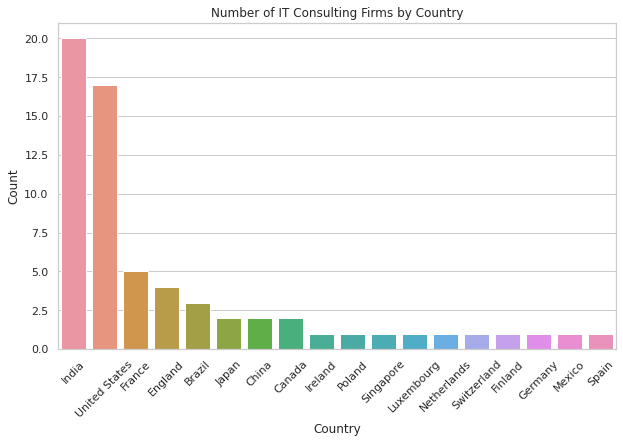

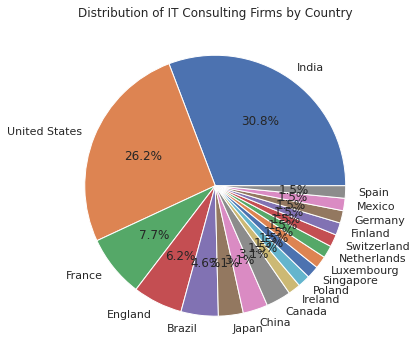

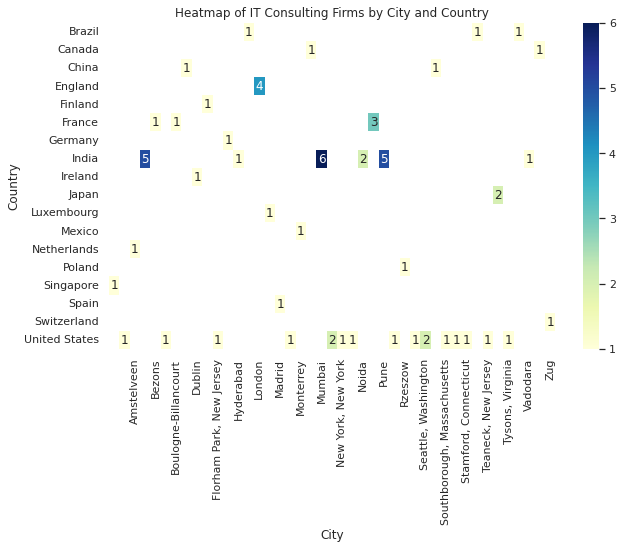

In [0]:
# Set Seaborn style
sns.set(style="whitegrid")

# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Country', order=combined_df['Country'].value_counts().index)
plt.title('Number of IT Consulting Firms by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(10, 6))
combined_df['Country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of IT Consulting Firms by Country')
plt.ylabel('')
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
heatmap_data = combined_df.pivot_table(index='Country', columns='City', values='Employees', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of IT Consulting Firms by City and Country')
plt.xlabel('City')
plt.ylabel('Country')
plt.show()
